<a href="https://colab.research.google.com/github/DavideBruni/CIDL_lab/blob/main/CIDL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [79]:
class PointsDataset(torch.utils.data.Dataset):

  def __init__(self,file):
    self.points = []
    with open(file,'r') as f:
      for line in f:
        self.points.append([float(x) for x in line.split(' ')])

  def __len__(self):
    return len(self.points)

  def __getitem__(self,i):
    return self.points[i]


In [80]:
ds = PointsDataset('dataset1.txt')
print(len(ds))
print(ds[88])

100
[-4.277150322515348, -12.83887433219623]


In [81]:
class LineModule(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.w = torch.nn.Parameter(torch.rand(1))

  def forward(self,input):
    return self.w * input


In [82]:
model = LineModule()
print(list(model.parameters()))
print(model(torch.tensor([1.])))

[Parameter containing:
tensor([0.0706], requires_grad=True)]
tensor([0.0706], grad_fn=<MulBackward0>)


In [84]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)
dl = torch.utils.data.DataLoader(dataset=ds, batch_size=8)
loss_fn = torch.nn.MSELoss()

for epoch in range(0,1000):
  for batch in dl:
    x,y = batch
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [85]:
print(list(model.parameters())[0][0].item())

2.397676944732666


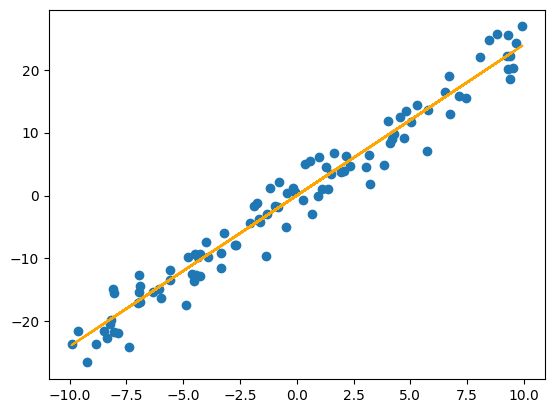

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('dataset1.txt', sep=' ', names=["X", "Y"])

tensor_y = model(torch.tensor(df['X'])).detach().numpy()
plt.plot(df['X'],df['Y'], 'o')
plt.plot(df['X'],tensor_y, color='orange')
plt.show()

# **Es 2**

In [ ]:
class PointsDataset(torch.utils.data.Dataset):

  def __init__(self,file):
    self.points = []
    with open(file,'r') as f:
      for line in f:
        x, y, c = line.split()
        self.points.append(torch.tensor([float(x), float(y), float(c)]))


  def __len__(self):
    return len(self.points)

  def __getitem__(self,i):
    return self.points[i]


In [50]:
ds_2 = PointsDataset('dataset2.txt')

In [51]:
class PolynomialModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.a = torch.nn.Parameter(torch.rand(1))
    self.b = torch.nn.Parameter(torch.rand(1))
    self.c = torch.nn.Parameter(torch.rand(1))
    self.d = torch.nn.Parameter(torch.rand(1))
    self.e = torch.nn.Parameter(torch.rand(1))

  def forward(self,x):
    return self.a*x.pow(4) + self.b*x.pow(3) + self.c*x.pow(2) + self.d*x + self.e

In [54]:
from tqdm import trange

EPOCHS = 1000
ds = PointsDataset("dataset2.txt")
dl = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)

model = PolynomialModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in trange(EPOCHS):
    for batch in dl:
        x = batch[:, 0]
        y = batch[:, 1]
        c = batch[:, 2]

        y_model = model(x)

        predicted_above = y_model > y
        actual_above = c == 1

        predicted_below = y_model < y
        actual_below = c == 0

        errors = torch.abs(y_model - y)
        errors[predicted_above == actual_above] = 0
        errors[predicted_below == actual_below] = 0

        loss = torch.mean(errors)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


100%|██████████| 1000/1000 [00:22<00:00, 43.91it/s]


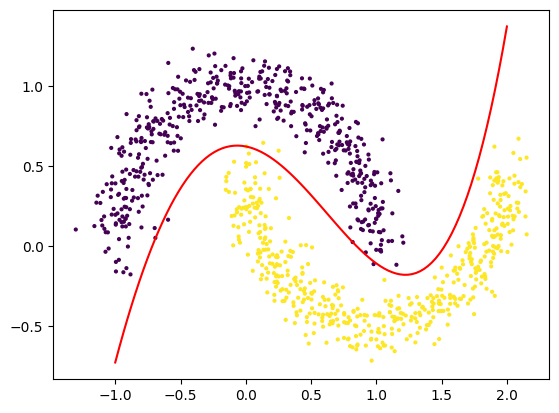

In [56]:
ds = PointsDataset("dataset2.txt")
xx = torch.linspace(-1, 2, 100)
yy = model(xx)

data = torch.stack(ds.points, dim=0)
plt.plot(xx, yy.detach(), c="r")
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=4)
plt.show()